# E-Ticaret Müşteri Kaybetme Analizi ve Tahmini


Bu proje, bir e-ticaret platformundan müşteri verilerinin analiz edilmesini, Python kullanılarak verilerin temizlenmesini, Power BI ile keşifsel veri analizinin (EDA) gerçekleştirilmesini, müşteri kaybını tahmin etmek için makine öğrenimi tekniklerinin uygulanmasını ve son olarak projenin dağıtılmasını içerir.


## Kütüphaneleri Tanımlama

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_curve,auc,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import pickle 

## Veri Setini Yükleme

In [69]:
file_path = 'C:/Users/Eda/Desktop/bitirme/data .csv'
df = pd.read_csv(file_path)

## EDA (Exploratory Data Analysis) Keşifsel Veri Analizi

In [70]:
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [71]:
df.tail(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5620,55621,0,3.0,Mobile Phone,1,35.0,Credit Card,Female,4.0,5,Mobile Phone,5,Single,3,0,15.0,1.0,2.0,5.0,163
5621,55622,1,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,NaN,1.0,234
5622,55623,0,13.0,Mobile Phone,3,31.0,E wallet,Female,3.0,5,Grocery,1,Married,2,0,12.0,4.0,NaN,7.0,245
5623,55624,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [72]:

print('Veri Boyutu:',df.shape)

Veri Boyutu: (5630, 20)


DataFrame 5630 satır içerir. DataFrame'de her biri farklı bir özelliği veya niteliği temsil eden 20 sütun vardır.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [74]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


describe() fonksiyonu, bir veri setinin temel istatistiksel özetini sağlar.

### Kayıp Değerleri Ele Alma

In [75]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [76]:
missing_values_count = df.isnull().sum()
# Eksik değerleri olan sütunları filtreler.
columns_with_missing_values = missing_values_count[missing_values_count > 0].index

# Eksik değerleri olan satırları filtreler.
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Yalnızca eksik değerleri olan sütun ve satırlardan oluşan yeni bir DataFrame oluşturur.
df_missing_values = rows_with_missing_values[columns_with_missing_values]

In [77]:
df_missing_values.head(50)

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
1,NaN,8.0,3.0,15.0,0.0,1.0,0.0
2,NaN,30.0,2.0,14.0,0.0,1.0,3.0
4,0.0,12.0,NaN,11.0,1.0,1.0,3.0
6,NaN,11.0,2.0,14.0,0.0,1.0,0.0
7,NaN,6.0,3.0,16.0,2.0,2.0,0.0
8,13.0,9.0,NaN,14.0,0.0,1.0,2.0
9,NaN,31.0,2.0,12.0,1.0,1.0,1.0
10,4.0,18.0,2.0,NaN,9.0,15.0,8.0
15,NaN,12.0,3.0,22.0,1.0,1.0,2.0
16,0.0,12.0,NaN,18.0,1.0,1.0,0.0


### Histogram Oluşturma Fonksiyonu 

In [78]:
def create_histograms(dataframe):
    num_columns = len(dataframe.columns)
    num_rows = (num_columns + 2) // 3  # Subplot için gereken satır sayısını hesaplar.

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))  # Subplot oluşturur.

    for idx, column in enumerate(dataframe.columns):
        row_idx = idx // 3
        col_idx = idx % 3

        sns.histplot(dataframe[column], bins=5, color='navy', edgecolor='white', ax=axes[row_idx, col_idx])  # Uygun eksene çizer.
        axes[row_idx, col_idx].set_title(f'{column} Yoğunluk Grafiği ile Histogram')
        axes[row_idx, col_idx].set_xlabel('Değer')
        axes[row_idx, col_idx].set_ylabel('Frekans / Yoğunluk')

    # Boş subplotları gizler.
    for idx in range(len(dataframe.columns), num_rows * 3):
        row_idx = idx // 3
        col_idx = idx % 3
        fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()  # Subplotlar arasındaki boşluğu ayarlar.
    plt.show()

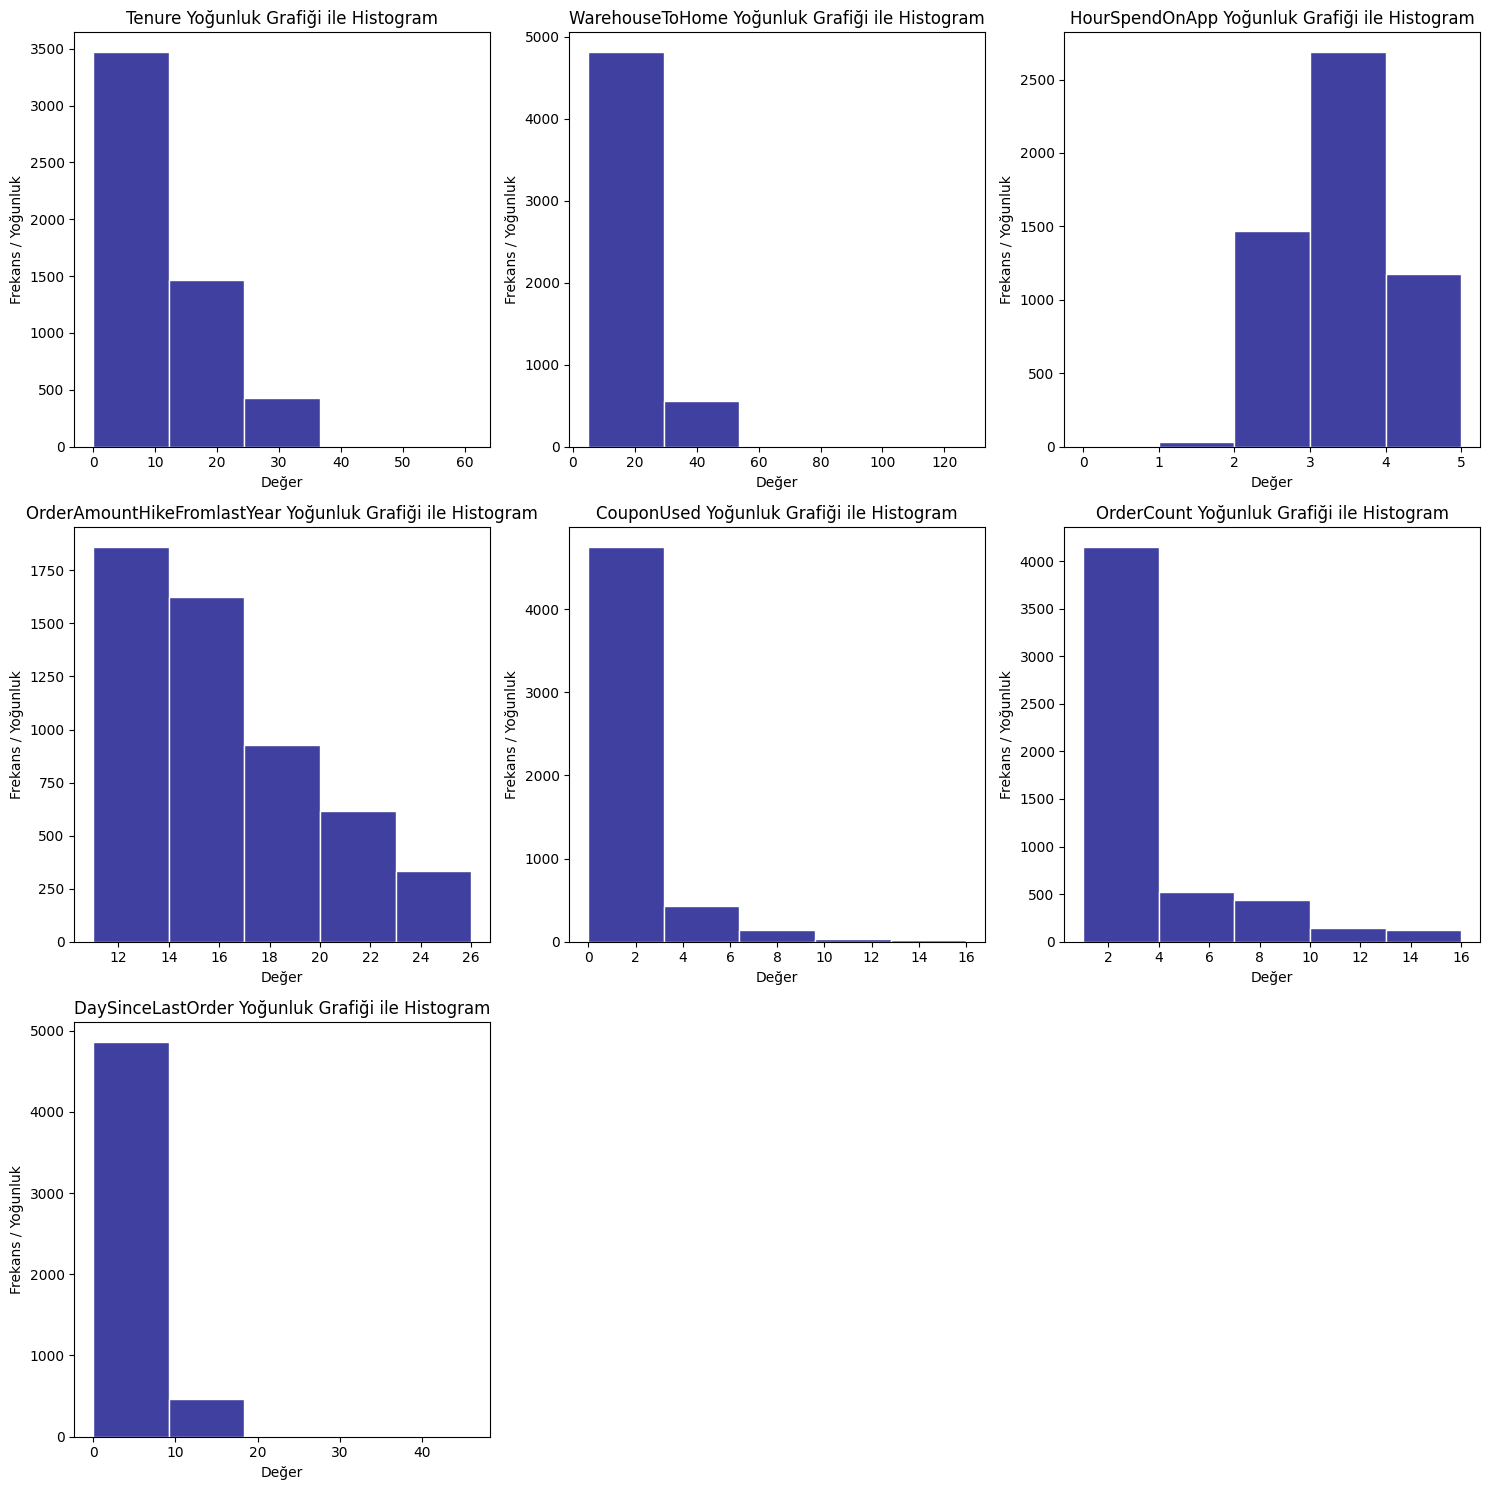

In [79]:
create_histograms(df[columns_with_missing_values])

Eksik değerler medyanla dolduruldu.

In [80]:
for column in columns_with_missing_values:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

In [81]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Görselleştirme

In [82]:
df.to_csv('PowerBi_visualization_data.csv', index=False)

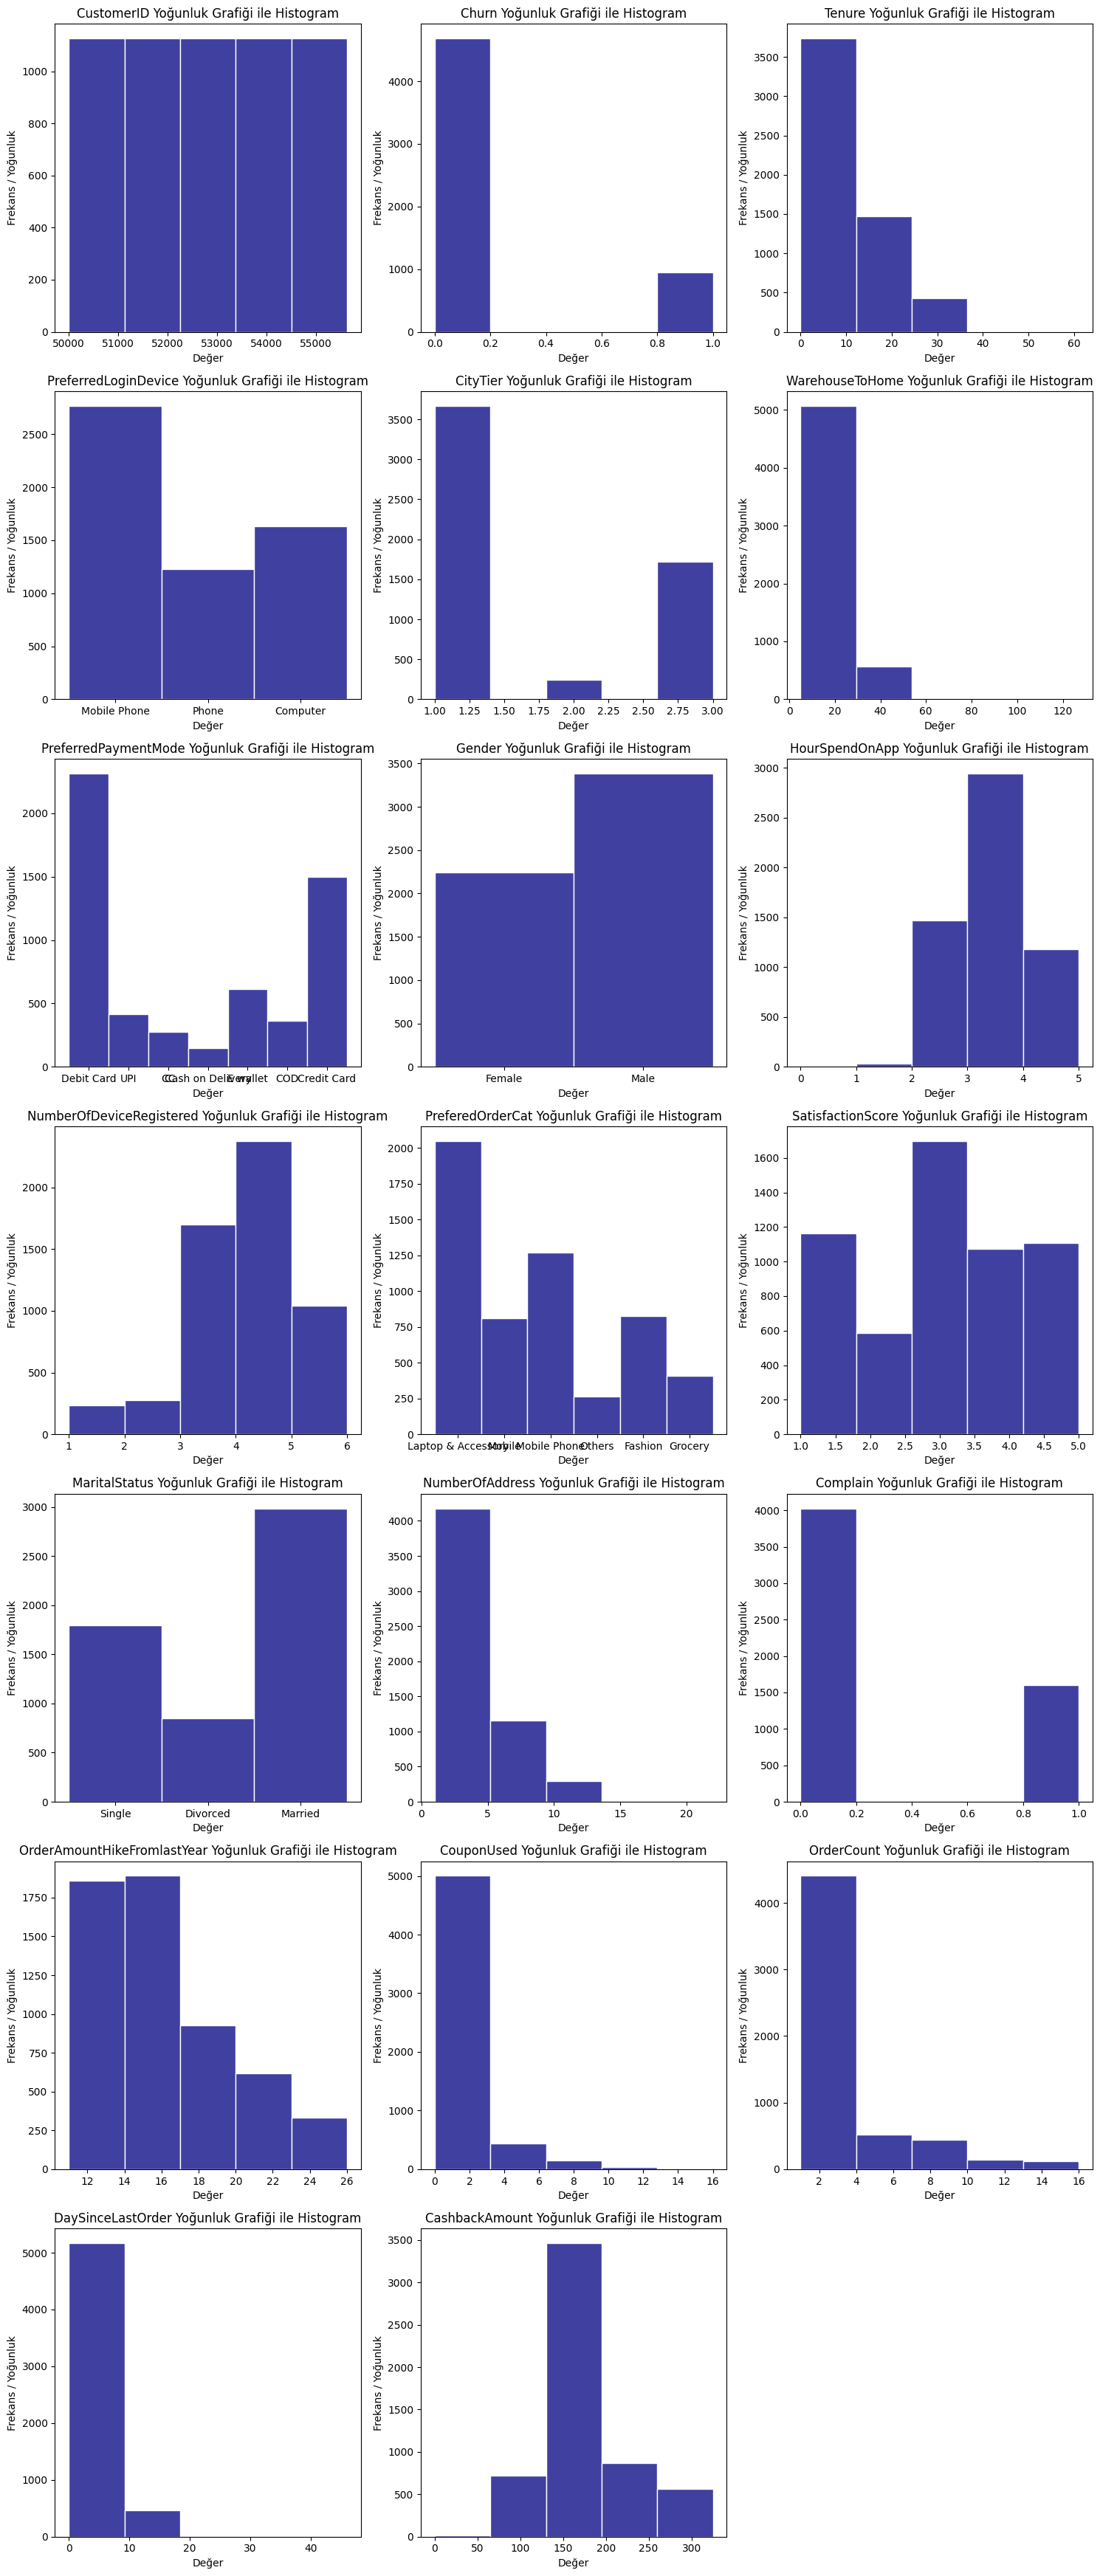

In [83]:
create_histograms(df)

## Pasta Grafik Gösterimi

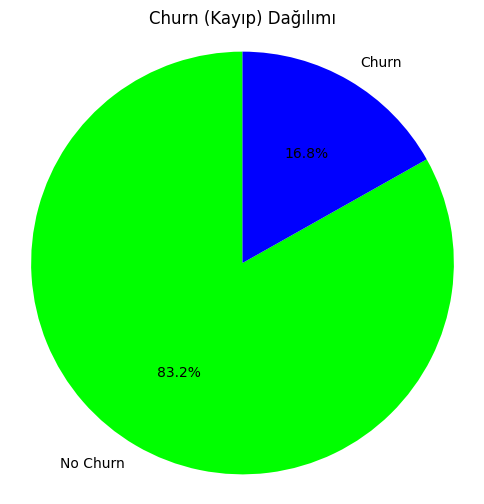

In [84]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['No Churn', 'Churn'], colors=['lime', 'blue'], autopct='%1.1f%%', startangle=90)
plt.title("Churn (Kayıp) Dağılımı")
plt.axis('equal')  #Pasta grafiğinin bir daire şeklinde çizilmesini sağlar. Bu, x ve y eksenlerinin ölçeklerinin eşit olmasını sağlar.
plt.show()

## Kategorik Değişkenlerin İşlenmesi

In [85]:
cat_col=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','PreferedOrderCat', 'MaritalStatus']

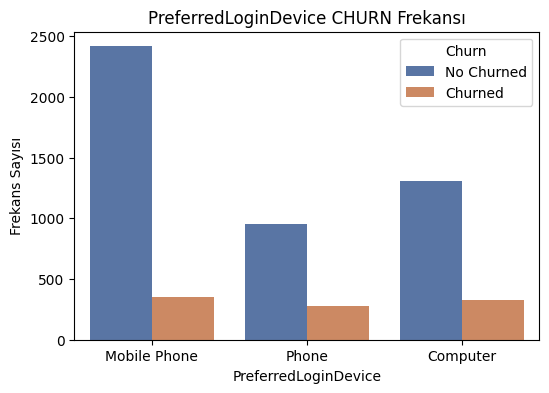

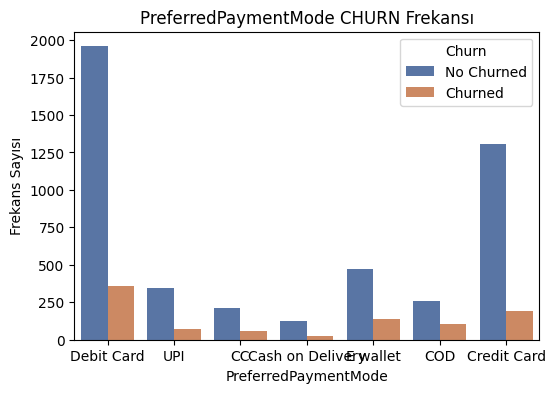

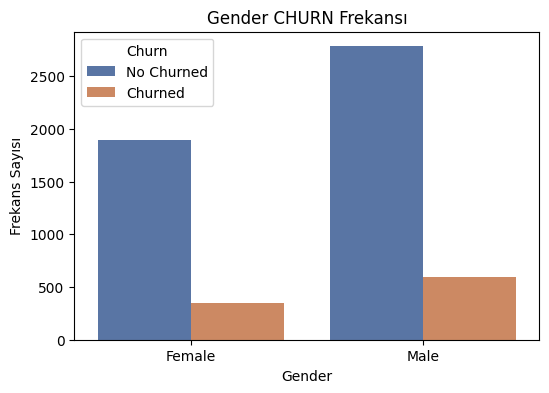

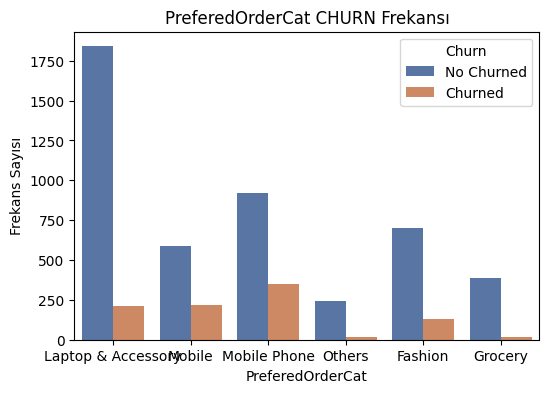

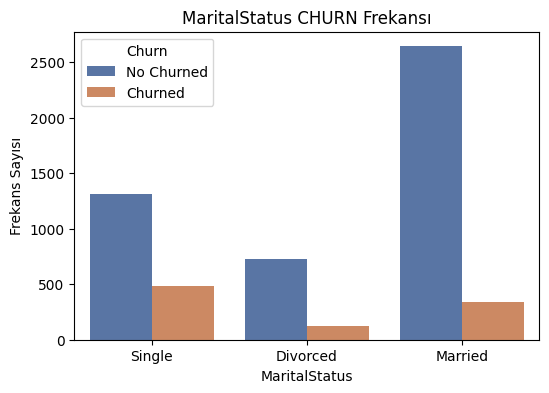

In [86]:
cat_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

# Frekans sayısı ve 'Churn' ortalaması ile çubuk grafikleri oluşturur.
for cat_col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=cat_col, data=df, hue='Churn', palette='deep')
    plt.title(f'{cat_col} CHURN Frekansı')
    plt.xlabel(cat_col)
    plt.ylabel('Frekans Sayısı')
    plt.legend(title='Churn', labels=['No Churned', 'Churned'])
    plt.show()


In [87]:
cat_col=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','PreferedOrderCat', 'MaritalStatus']

In [88]:
cat_col=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','PreferedOrderCat', 'MaritalStatus']

# "Reverse Mapping" saklamak için sözlük oluşturur.
reverse_mapping = {}

# Her kategorik sütun için frekans kodlaması
for cat_col_name in cat_col:
    frequency_map = df[cat_col_name].value_counts(normalize=True).to_dict()
    df[cat_col_name] = df[cat_col_name].map(frequency_map)
    
    # Reverse Mapping saklar.
    reverse_mapping[cat_col_name] = {v: k for k, v in frequency_map.items()}

# "Reverse Mapping" değerlerini yazdırır.
for col, mapping in reverse_mapping.items():
    print(f"\n{col} Reverse Mapping Gösterimi:")
    for encoded_value, original_value in mapping.items():
        print(f"{encoded_value:.2f} -> {original_value}")


PreferredLoginDevice Reverse Mapping Gösterimi:
0.49 -> Mobile Phone
0.29 -> Computer
0.22 -> Phone

PreferredPaymentMode Reverse Mapping Gösterimi:
0.41 -> Debit Card
0.27 -> Credit Card
0.11 -> E wallet
0.07 -> UPI
0.06 -> COD
0.05 -> CC
0.03 -> Cash on Delivery

Gender Reverse Mapping Gösterimi:
0.60 -> Male
0.40 -> Female

PreferedOrderCat Reverse Mapping Gösterimi:
0.36 -> Laptop & Accessory
0.23 -> Mobile Phone
0.15 -> Fashion
0.14 -> Mobile
0.07 -> Grocery
0.05 -> Others

MaritalStatus Reverse Mapping Gösterimi:
0.53 -> Married
0.32 -> Single
0.15 -> Divorced


## Aykırı Değer Tespiti

In [89]:
def create_box_plots(dataframe):
    num_columns = len(dataframe.columns)
    num_rows = (num_columns + 2) // 3  #Subplot için gereken satır sayısını hesaplar.

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))  # Subplot oluşturur.

    for idx, column in enumerate(dataframe.columns):
        row_idx = idx // 3
        col_idx = idx % 3

        sns.boxplot(dataframe[column], ax=axes[row_idx, col_idx])  # Uygun eksene çizer.
        axes[row_idx, col_idx].set_title(f'{column} Değişkeninin Kutu Grafiği Gösterimi')
        axes[row_idx, col_idx].set_xlabel('Value')

    # Boş subplotları gizler.
    for idx in range(len(dataframe.columns), num_rows * 3):
        row_idx = idx // 3
        col_idx = idx % 3
        fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()  # Subplotlar arasındaki boşluğu ayarlar.
    plt.show()

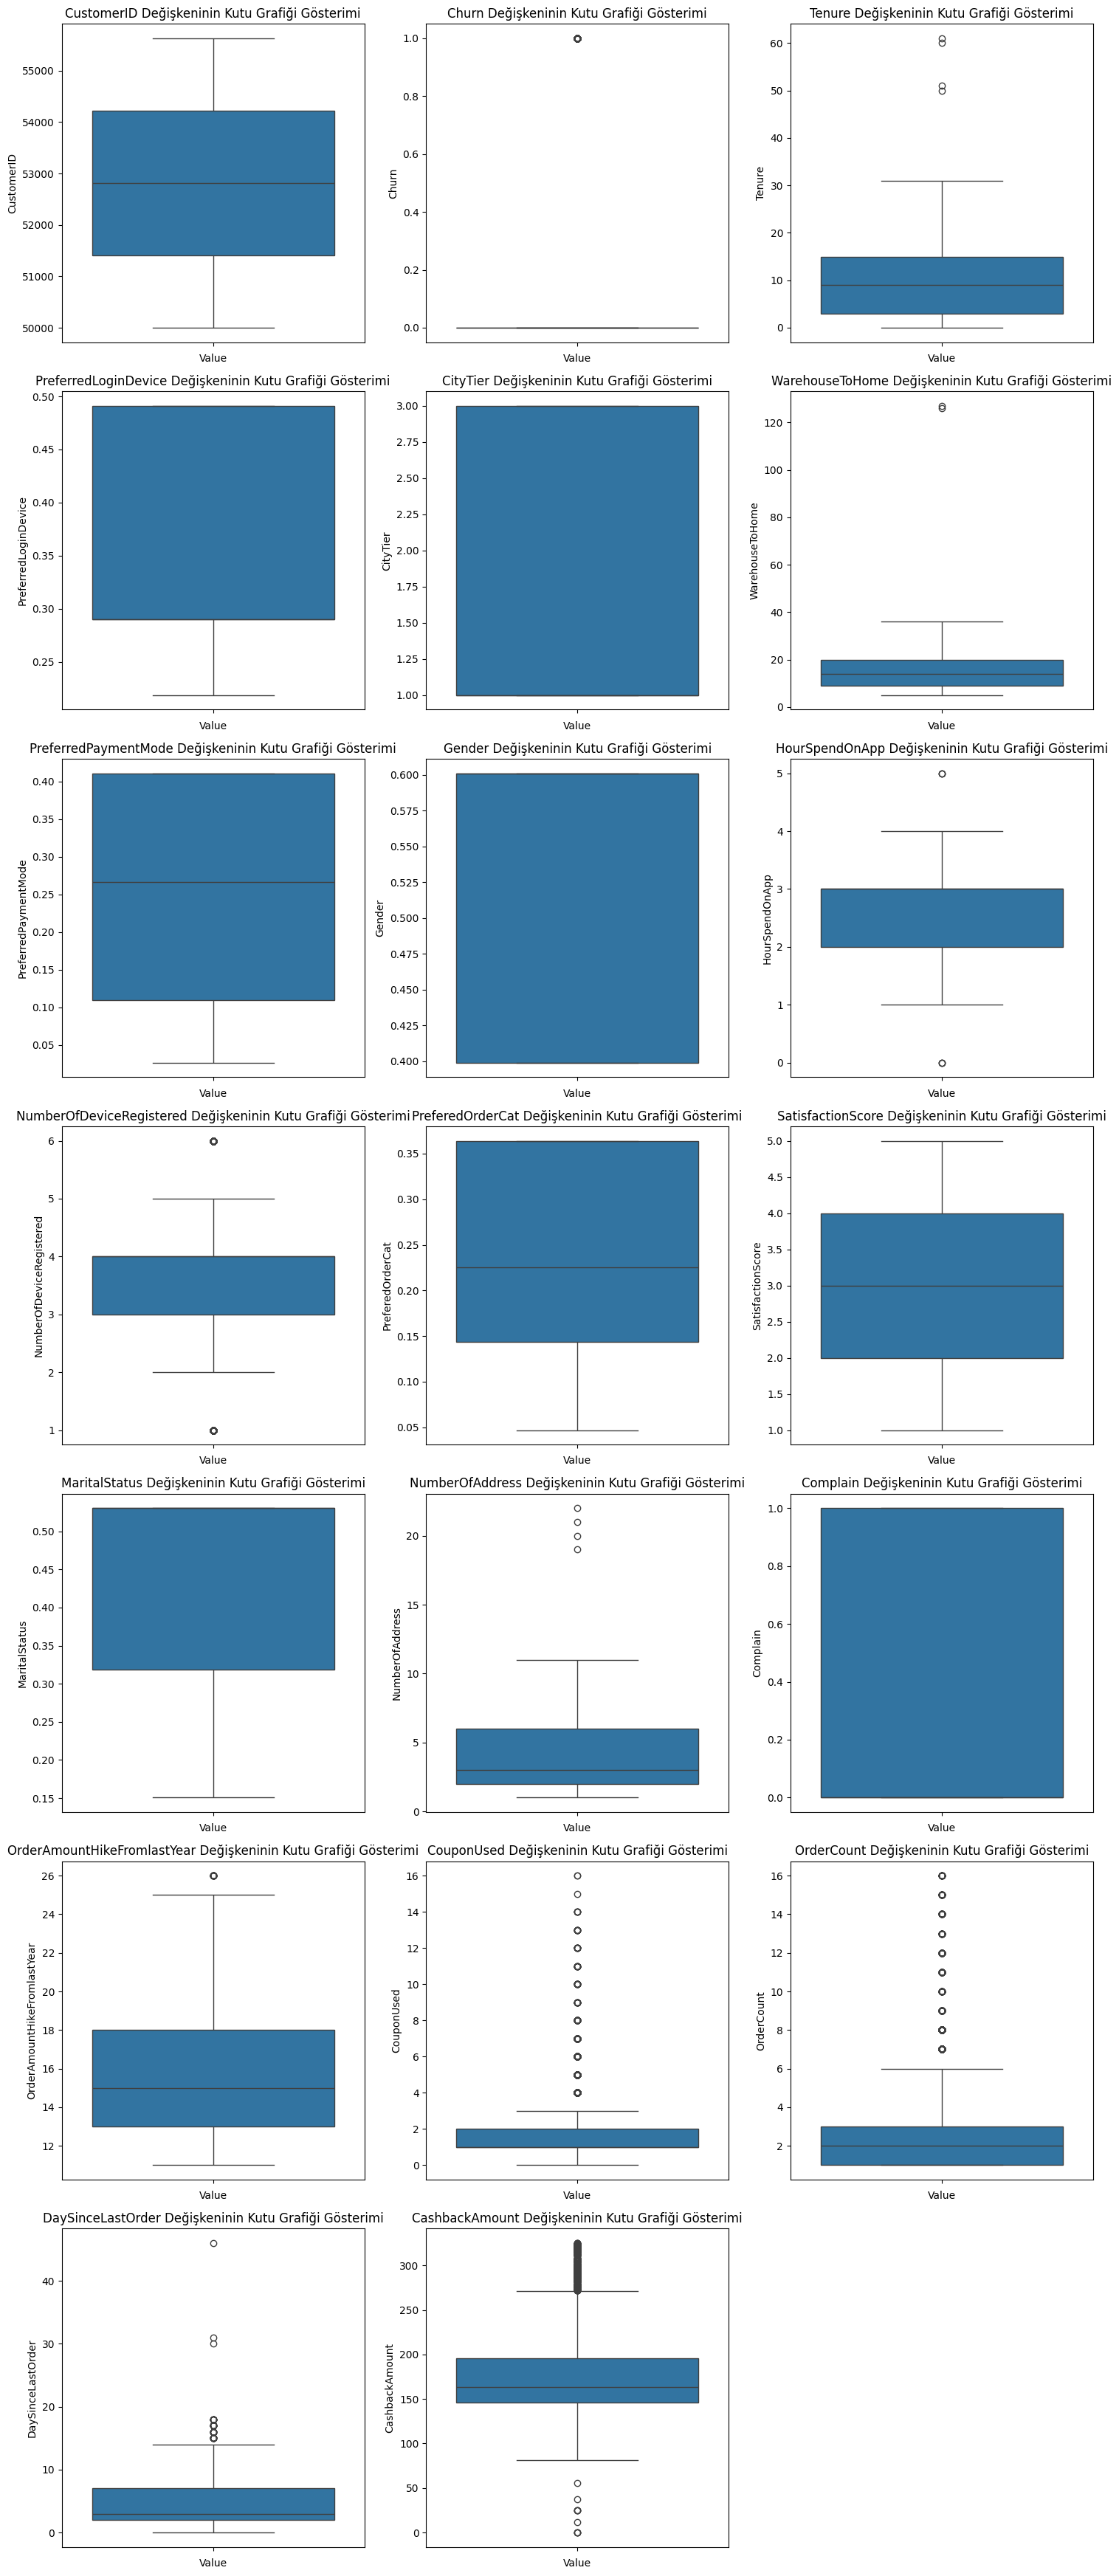

In [90]:
create_box_plots(df)

## Isı Haritası

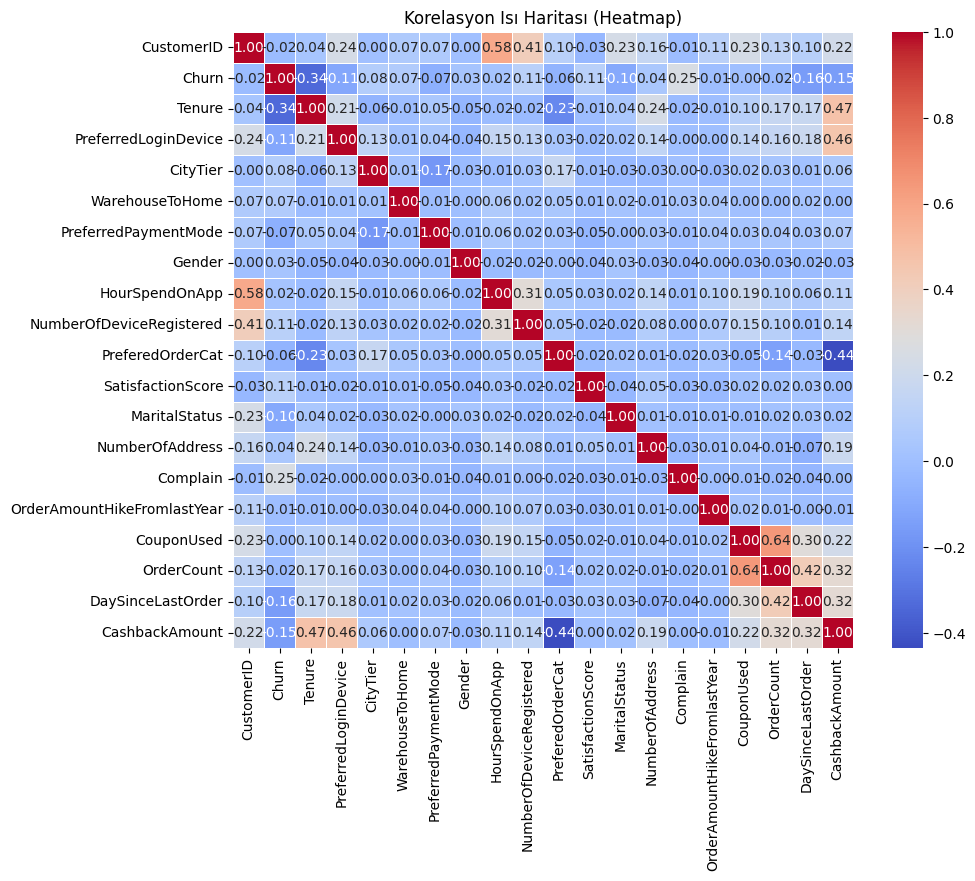

In [91]:
correlation_matrix = df.corr()

# Isı haritasını (heat map) oluşturur.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Isı Haritası (Heatmap)')
plt.show()


In [92]:
correlation_with_churn = df.corr()['Churn'].drop('Churn')
sorted_correlation = correlation_with_churn.abs().sort_values(ascending=False)

print("Churn ile korelasyon:")
print(sorted_correlation*100)

Churn ile korelasyon:
Tenure                         33.783084
Complain                       25.018825
DaySinceLastOrder              15.587091
CashbackAmount                 15.416120
PreferredLoginDevice           11.428731
NumberOfDeviceRegistered       10.793855
SatisfactionScore              10.548115
MaritalStatus                  10.092448
CityTier                        8.470317
PreferredPaymentMode            7.359886
WarehouseToHome                 6.954372
PreferedOrderCat                5.558905
NumberOfAddress                 4.393102
Gender                          2.926357
OrderCount                      2.403753
CustomerID                      1.908277
HourSpendOnApp                  1.881578
OrderAmountHikeFromlastYear     0.707492
CouponUsed                      0.143011
Name: Churn, dtype: float64


Eşik değerinin üzerinde (10) korelasyona sahip özelliklerin seçilmesi.

## Öznitelik Seçimi

In [93]:
df_1=df[['Tenure','Complain','DaySinceLastOrder','CashbackAmount','PreferredLoginDevice','NumberOfDeviceRegistered','SatisfactionScore','MaritalStatus','Churn']]

In [94]:
df_1

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,Churn
0,4.0,1,5.0,160,0.491119,3,2,0.319005,1
1,9.0,1,0.0,121,0.218650,4,3,0.319005,1
2,9.0,1,3.0,120,0.218650,4,3,0.319005,1
3,0.0,0,3.0,134,0.218650,4,5,0.319005,1
4,0.0,0,3.0,130,0.218650,3,5,0.319005,1
...,...,...,...,...,...,...,...,...,...
5625,10.0,0,4.0,151,0.290231,2,1,0.530373,0
5626,13.0,0,3.0,225,0.491119,5,5,0.530373,0
5627,1.0,1,4.0,186,0.491119,2,4,0.530373,0
5628,23.0,0,9.0,179,0.290231,5,4,0.530373,0


In [95]:
summary = df_1.describe()

In [96]:
print(summary)

            Tenure     Complain  DaySinceLastOrder  CashbackAmount  \
count  5630.000000  5630.000000        5630.000000     5630.000000   
mean     10.134103     0.284902           4.459325      177.221492   
std       8.357951     0.451408           3.570626       49.193869   
min       0.000000     0.000000           0.000000        0.000000   
25%       3.000000     0.000000           2.000000      146.000000   
50%       9.000000     0.000000           3.000000      163.000000   
75%      15.000000     1.000000           7.000000      196.000000   
max      61.000000     1.000000          46.000000      325.000000   

       PreferredLoginDevice  NumberOfDeviceRegistered  SatisfactionScore  \
count           5630.000000               5630.000000        5630.000000   
mean               0.373240                  3.688988           3.066785   
std                0.118541                  1.023999           1.380194   
min                0.218650                  1.000000           1

## X ve Y'ye Bölme

In [97]:
X_1 = df_1.drop(columns=['Churn']) 

In [98]:
X_1

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus
0,4.0,1,5.0,160,0.491119,3,2,0.319005
1,9.0,1,0.0,121,0.218650,4,3,0.319005
2,9.0,1,3.0,120,0.218650,4,3,0.319005
3,0.0,0,3.0,134,0.218650,4,5,0.319005
4,0.0,0,3.0,130,0.218650,3,5,0.319005
...,...,...,...,...,...,...,...,...
5625,10.0,0,4.0,151,0.290231,2,1,0.530373
5626,13.0,0,3.0,225,0.491119,5,5,0.530373
5627,1.0,1,4.0,186,0.491119,2,4,0.530373
5628,23.0,0,9.0,179,0.290231,5,4,0.530373


In [99]:
y_1=df_1['Churn']

In [100]:
y_1

0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: Churn, Length: 5630, dtype: int64

## Özellik Ölçeklendirme

In [101]:
scaler = MinMaxScaler()
X_1 = scaler.fit_transform(X_1)

## Veri Setindeki Verileri Test Setlerine Bölme

Train Seti Boyutu = %80 Test Seti Boyutu = %20

In [102]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=123,stratify=y_1)

## Aşırı Örnekleme

In [103]:
sm=SMOTE()

X_train_1,y_train_1=sm.fit_resample(X_train_1,y_train_1)

In [104]:
print(X_train_1.shape)
print(y_train_1.shape)

(7492, 8)
(7492,)


# Modeller

## Lojistik Regresyon

In [105]:
log = LogisticRegression()
log.fit(X_train_1, y_train_1)
log_pred = log.predict(X_test_1)

Log_precision  = precision_score(y_test_1, log_pred)
Log_recall     = recall_score(y_test_1, log_pred)
Log_f1_score   = f1_score(y_test_1, log_pred)
Log_accuracy   = accuracy_score(y_test_1, log_pred)

print("Lojistik Regresyonun Hassasiyeti  :", Log_precision)
print("Lojistik Regresyonun Duyarlılığı  :", Log_recall)
print("F1 Lojistik Regresyon Puanı       :", Log_f1_score)
print("Lojistik Regresyonun Doğruluğu    :", Log_accuracy)

# Sınıflandırma Raporu
print("\n Sınıflandırma Raporu")
print(classification_report(y_test_1, log_pred))

# Karışıklık (Confusion) Matrisi
conf_matrix = confusion_matrix(y_test_1, log_pred)
print("\nKarışıklık Matrisi")
print("                   Tahmin Edilen Not Churn   Tahmin Edilen Churn")
print("Gerçek Not Churn         {}                        {}".format(conf_matrix[0, 0], conf_matrix[0, 1]))
print("Gerçek Churn             {}                         {}".format(conf_matrix[1, 0], conf_matrix[1, 1]))

Lojistik Regresyonun Hassasiyeti  : 0.4005235602094241
Lojistik Regresyonun Duyarlılığı  : 0.8052631578947368
F1 Lojistik Regresyon Puanı       : 0.534965034965035
Lojistik Regresyonun Doğruluğu    : 0.7637655417406749

 Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       936
           1       0.40      0.81      0.53       190

    accuracy                           0.76      1126
   macro avg       0.68      0.78      0.69      1126
weighted avg       0.86      0.76      0.79      1126


Karışıklık Matrisi
                   Tahmin Edilen Not Churn   Tahmin Edilen Churn
Gerçek Not Churn         707                        229
Gerçek Churn             37                         153


## KNN

In [106]:
knn = KNeighborsClassifier()
knn.fit(X_train_1, y_train_1)
knn_pred = knn.predict(X_test_1)

KNN_precision  = precision_score(y_test_1, knn_pred)
KNN_recall     = recall_score(y_test_1, knn_pred)
KNN_f1_score   = f1_score(y_test_1, knn_pred)
KNN_accuracy   = accuracy_score(y_test_1, knn_pred)

print("KNN Hassasiyeti  :", KNN_precision)
print("KNN Duyarlılığı  :", KNN_recall)
print("KNN F1 Puanı     :", KNN_f1_score)
print("KNN Doğruluğu    :", KNN_accuracy)

# Sınıflandırma Raporu
print("\n Sınıflandırma Raporu:")
print(classification_report(y_test_1, knn_pred))

# Karışıklık (Confusion) Matrisi
conf_matrix_knn = confusion_matrix(y_test_1, knn_pred)
print("\nKarışıklık Matrisi")
print("                   Tahmin Edilen Not churn   Tahmin Edilen Churn")
print("Gerçek Not Churn        {}                         {}".format(conf_matrix_knn[0, 0], conf_matrix_knn[0, 1]))
print("Gerçek Churn            {}                          {}".format(conf_matrix_knn[1, 0], conf_matrix_knn[1, 1]))

KNN Hassasiyeti  : 0.4676923076923077
KNN Duyarlılığı  : 0.8
KNN F1 Puanı     : 0.5902912621359223
KNN Doğruluğu    : 0.8126110124333925

 Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       936
           1       0.47      0.80      0.59       190

    accuracy                           0.81      1126
   macro avg       0.71      0.81      0.73      1126
weighted avg       0.87      0.81      0.83      1126


Karışıklık Matrisi
                   Tahmin Edilen Not churn   Tahmin Edilen Churn
Gerçek Not Churn        763                         173
Gerçek Churn            38                          152


## SVC

In [107]:
svc = SVC()
svc.fit(X_train_1, y_train_1)
svc_pred = svc.predict(X_test_1)

SVC_precision  = precision_score(y_test_1, svc_pred)
SVC_recall     = recall_score(y_test_1, svc_pred)
SVC_f1_score   = f1_score(y_test_1, svc_pred)
SVC_accuracy   = accuracy_score(y_test_1, svc_pred)

print("SVC Hassasiyeti  :", SVC_precision)
print("SVC Duyarlılığı  :", SVC_recall)
print("SVC F1 Puanı     :", SVC_f1_score)
print("SVC Doğruluğu    :", SVC_accuracy)

# Sınıflandırma Raporu
print("\n Sınıflandırma Raporu:")
print(classification_report(y_test_1, svc_pred))

# Karışıklık (Confusion) Matrisi
conf_matrix_svc = confusion_matrix(y_test_1, svc_pred)
print("\nKarışıklık Matrisi:")
print("                   Tahmin Edilen Not Churn   Tahmin Edilen Churn")
print("Gerçek Not Churn        {}                    {}".format(conf_matrix_svc[0, 0], conf_matrix_svc[0, 1]))
print("Gerçek Churn            {}                     {}".format(conf_matrix_svc[1, 0], conf_matrix_svc[1, 1]))

SVC Hassasiyeti  : 0.44837758112094395
SVC Duyarlılığı  : 0.8
SVC F1 Puanı     : 0.5746691871455577
SVC Doğruluğu    : 0.8001776198934281

 Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       936
           1       0.45      0.80      0.57       190

    accuracy                           0.80      1126
   macro avg       0.70      0.80      0.72      1126
weighted avg       0.87      0.80      0.82      1126


Karışıklık Matrisi:
                   Tahmin Edilen Not Churn   Tahmin Edilen Churn
Gerçek Not Churn        749                    187
Gerçek Churn            38                     152


## Random Forest Sınıflandırıcı

In [108]:
rfc_model= RandomForestClassifier()
rfc_model.fit(X_train_1, y_train_1)
rfc_pred = rfc_model.predict(X_test_1)

RFC_precision = precision_score(y_test_1, rfc_pred)
RFC_recall    = recall_score(y_test_1, rfc_pred)
RFC_f1_score  = f1_score(y_test_1, rfc_pred)
RFC_accuracy  = accuracy_score(y_test_1, rfc_pred)

print("Random Forest Sınıflandırıcısının Hassasiyeti  :", RFC_precision)
print("Random Forest Sınıflandırıcısının Duyarlılığı  :", RFC_recall)
print("Random Forest Sınıflandırıcısının F1 Puanı     :", RFC_f1_score)
print("Random Forest Sınıflandırıcısının Doğruluğu    :", RFC_accuracy)

# Sınıflandırma Raporu
print("\n Sınıflandırma Raporu:")
print(classification_report(y_test_1, rfc_pred))

# Karışıklık (Confusion) Matrisi
conf_matrix_rfc = confusion_matrix(y_test_1, rfc_pred)
print("\nKarışıklık Matrisi:")
print("                   Tahmin Edilen Not Churn   Tahmin Edilen Churn")
print("Gerçek Not Churn        {}                    {}".format(conf_matrix_rfc[0, 0], conf_matrix_rfc[0, 1]))
print("Gerçek Churn            {}                     {}".format(conf_matrix_rfc[1, 0], conf_matrix_rfc[1, 1]))

Random Forest Sınıflandırıcısının Hassasiyeti  : 0.8064516129032258
Random Forest Sınıflandırıcısının Duyarlılığı  : 0.7894736842105263
Random Forest Sınıflandırıcısının F1 Puanı     : 0.7978723404255319
Random Forest Sınıflandırıcısının Doğruluğu    : 0.9325044404973357

 Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       936
           1       0.81      0.79      0.80       190

    accuracy                           0.93      1126
   macro avg       0.88      0.88      0.88      1126
weighted avg       0.93      0.93      0.93      1126


Karışıklık Matrisi:
                   Tahmin Edilen Not Churn   Tahmin Edilen Churn
Gerçek Not Churn        900                    36
Gerçek Churn            40                     150


## XGB Sınıflandırıcı

In [109]:
xgb = XGBClassifier()
xgb.fit(X_train_1, y_train_1)
xgb_pred = xgb.predict(X_test_1)

XGB_precision  = precision_score(y_test_1, xgb_pred)
XGB_recall     = recall_score(y_test_1, xgb_pred)
XGB_f1_score   = f1_score(y_test_1, xgb_pred)
XGB_accuracy   = accuracy_score(y_test_1, xgb_pred)

print("XGBoost Sınıflandırıcının Hassasiyeti  :", XGB_precision)
print("XGBoost Sınıflandırıcının Duyarlılığı  :", XGB_recall)
print("XGBoost Sınıflandırıcının F1 Puanı     :", XGB_f1_score)
print("XGBoost Sınıflandırıcının Doğruluğu    :", XGB_accuracy)

# Sınıflandırma Raporu
print("\n Sınıflandırma Raporu:")
print(classification_report(y_test_1, xgb_pred))

# Karışıklık Matrisi
conf_matrix_xgb = confusion_matrix(y_test_1, xgb_pred)
print("\nKarışıklık Matrisi:")
print("                   Tahmin Edilen Not Churn   Tahmin Edilen Churn")
print("Gerçek Not Churn        {}                    {}".format(conf_matrix_xgb[0, 0], conf_matrix_xgb[0, 1]))
print("Gerçek Churn            {}                     {}".format(conf_matrix_xgb[1, 0], conf_matrix_xgb[1, 1]))

XGBoost Sınıflandırıcının Hassasiyeti  : 0.7474747474747475
XGBoost Sınıflandırıcının Duyarlılığı  : 0.7789473684210526
XGBoost Sınıflandırıcının F1 Puanı     : 0.7628865979381443
XGBoost Sınıflandırıcının Doğruluğu    : 0.9182948490230906

 Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       936
           1       0.75      0.78      0.76       190

    accuracy                           0.92      1126
   macro avg       0.85      0.86      0.86      1126
weighted avg       0.92      0.92      0.92      1126


Karışıklık Matrisi:
                   Tahmin Edilen Not Churn   Tahmin Edilen Churn
Gerçek Not Churn        886                    50
Gerçek Churn            42                     148


## Model Sonuçları

In [122]:
model_scores = {
    'Lojistik Regresyon' : {'Tahmin Edilen': Log_precision, 'Duyarlılık': Log_recall, 'F1 Puan': Log_f1_score, 'Doğruluk': Log_accuracy},
    'KNN'                : {'Tahmin Edilen': KNN_precision, 'Duyarlılık': KNN_recall, 'F1 Puan': KNN_f1_score, 'Doğruluk': KNN_accuracy},
    'SVC'                : {'Tahmin Edilen': SVC_precision, 'Duyarlılık': SVC_recall, 'F1 Puan': SVC_f1_score, 'Doğruluk': SVC_accuracy},
    'Random Forest'      : {'Tahmin Edilen': RFC_precision, 'Duyarlılık': RFC_recall, 'F1 Puan': RFC_f1_score, 'Doğruluk': RFC_accuracy},
    'XGBoost'            : {'Tahmin Edilen': XGB_precision, 'Duyarlılık': XGB_recall, 'F1 Puan': XGB_f1_score, 'Doğruluk': XGB_accuracy}
}

In [111]:
results_df = pd.DataFrame.from_dict(model_scores, orient='index')
results_df.index.name = 'Algoritma'
results_df.reset_index(inplace=True)

print(results_df)

            Algoritma  Tahmin Edilen  Duyarlılık   F1 Puan  Doğruluk
0  Lojistik Regresyon       0.400524    0.805263  0.534965  0.763766
1                 KNN       0.467692    0.800000  0.590291  0.812611
2                 SVC       0.448378    0.800000  0.574669  0.800178
3       Random Forest       0.806452    0.789474  0.797872  0.932504
4             XGBoost       0.747475    0.778947  0.762887  0.918295


## Çıkan Sonuç || Random Forest Sınıflandırıcı En İyi Genel Performansa Sahiptir

## Tüm Modellerin AUC-ROC Eğrisi

Makine öğrenimi modellerinin performansını değerlendirmek için kullanılan AUC (Area Under the Curve) ve ROC (Receiver Operating Characteristic) eğrisi, sınıflandırma problemlerinde yaygın olarak kullanılan ölçümlerdir. Bu ölçümler, bir sınıflandırma modelinin performansını değerlendirmenin aynı sıra farklı modellerin karşılaştırılmasına ve en iyi modelin seçilmesine de yardımcı olur.

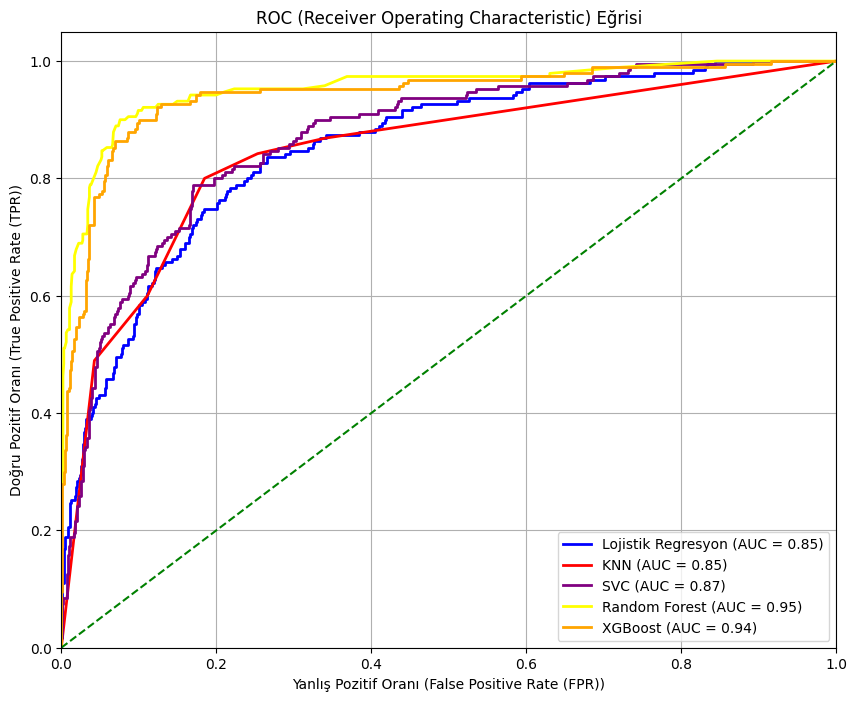

In [130]:
# Lojistik Regresyon Modeli için ROC Eğrisi
log_probs = log.predict_proba(X_test_1)[:, 1]
log_fpr, log_tpr, _ = roc_curve(y_test_1, log_probs)
log_auc = auc(log_fpr, log_tpr)

# KNN Modeli için ROC Eğrisi
knn_probs = knn.predict_proba(X_test_1)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test_1, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

# SVC Modeli için ROC Eğrisi
svc_probs = svc.decision_function(X_test_1)  # SVC için decision_function kullanılır
svc_fpr, svc_tpr, _ = roc_curve(y_test_1, svc_probs)
svc_auc = auc(svc_fpr, svc_tpr)

# Random Forest Modeli için ROC Eğrisi
rfc_probs = rfc_model.predict_proba(X_test_1)[:, 1]
rfc_fpr, rfc_tpr, _ = roc_curve(y_test_1, rfc_probs)
rfc_auc = auc(rfc_fpr, rfc_tpr)

# XGBoost Modeli için ROC Eğrisi
xgb_probs = xgb.predict_proba(X_test_1)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_1, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Tüm Modelleri ROC Eğrisinde Çizdirme
plt.figure(figsize=(10, 8))

# Lojistik Regresyon ROC Eğrisi
plt.plot(log_fpr, log_tpr, color='blue', lw=2, label='Lojistik Regresyon (AUC = %0.2f)' % log_auc)

# KNN ROC Eğrisi
plt.plot(knn_fpr, knn_tpr, color='red', lw=2, label='KNN (AUC = %0.2f)' % knn_auc)

# SVC ROC Eğrisi
plt.plot(svc_fpr, svc_tpr, color='purple', lw=2, label='SVC (AUC = %0.2f)' % svc_auc)

# Random Forest ROC Eğrisi
plt.plot(rfc_fpr, rfc_tpr, color='yellow', lw=2, label='Random Forest (AUC = %0.2f)' % rfc_auc)

# XGBoost ROC Eğrisi
plt.plot(xgb_fpr, xgb_tpr, color='orange', lw=2, label='XGBoost (AUC = %0.2f)' % xgb_auc)

# Rastgele Tahmin Çizgisi
plt.plot([0, 1], [0, 1], color='green', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (False Positive Rate (FPR))')
plt.ylabel('Doğru Pozitif Oranı (True Positive Rate (TPR))')
plt.title('ROC (Receiver Operating Characteristic) Eğrisi')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Seçilen Modelin AUC-ROC Eğrisi

Random Forest Sınıflandırıcısının AUC Hesaplaması : 0.9541357399910032


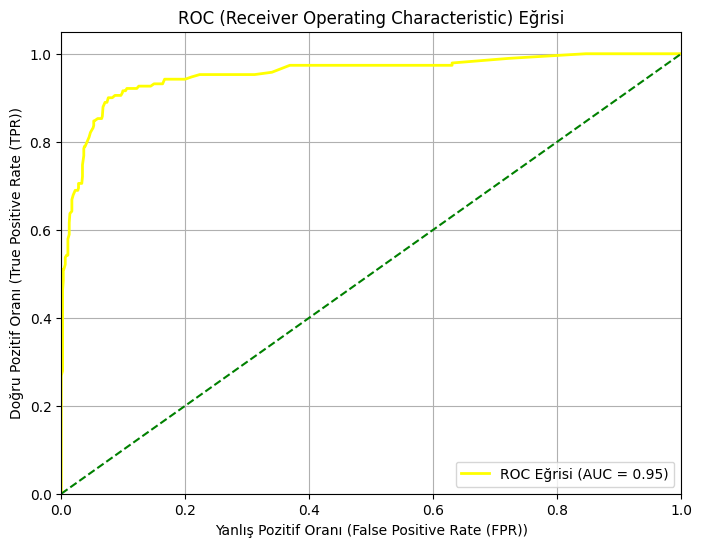

In [112]:
rfc_probs = rfc_model.predict_proba(X_test_1)[:, 1]

# ROC Eğrisini Hesaplama
fpr, tpr, thresholds = roc_curve(y_test_1, rfc_probs)

# AUC Eğrisini Hesaplama
roc_auc = auc(fpr, tpr)

# AUC Eğrisini Yazdırır
print("Random Forest Sınıflandırıcısının AUC Hesaplaması :", roc_auc)

# ROC Eğrisini Çizer.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='yellow', lw=2, label='ROC Eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')  # Rastgele Tahmin Çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (False Positive Rate (FPR))')
plt.ylabel('Doğru Pozitif Oranı (True Positive Rate (TPR))')
plt.title('ROC (Receiver Operating Characteristic) Eğrisi')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Kayıp Tahmininde müşterinin kaybolmasını önlemek için Gerçek Pozitif Orana (TPR) odaklanıyoruz. Odak noktası TPR olduğundan, 0,4 ile 0,6 arasındaki herhangi bir eşiği alabiliriz. Varsayılan eşik 0,5'tir. 0,5 eşikle AUC 0,96'dır ve 1'e çok yakın olan Rastgele Orman Sınıflandırıcısı iyi performans göstermektedir.

## Modeli PKL Dosyasına Kaydetme

In [114]:
with open('model.pkl', 'wb') as files:
    pickle.dump(rfc_model, files)

## Modelin Test Edilmesi

In [115]:
test_data= df_1.sample(n=1)
test_data

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,Churn
147,9.0,0,4.0,121,0.21865,3,2,0.150622,0


In [116]:
def Model(test_data):
  #Çıktılar, ölçekleyici tarafından test veri kümesine uygulanmıştır.
  #outputs = scaler.transform(test_data)
  output=rfc_model.predict(test_data)
  if output == 1:
    print('Churn')
  else:
    print('Not Churn')

In [117]:
Model([(0.0	,1	,0.0	,123	,0.21865	,4	,5	,0.530373)])

Churn


In [118]:
Model([(22.0	,1	,7.0	,240	,0.491119	,4	,3	,0.319005)])

Not Churn


In [119]:
Model([(1.0	,0	,1.0	,140	,0.290231	,4	,3	,0.319005)])

Not Churn


In [121]:
Model([(0.0	,1	,0.0	,124	,0.21865	,4	,4	,0.530373)])

Churn


In [135]:
df_1 = pd.DataFrame(df)

# Veriyi özellikler ve etiketler olarak ayırma
X = df_1.drop('Churn', axis=1)
y = df_1['Churn']

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ölçekleyici ve modeli tanımlama
scaler = StandardScaler()
rfc_model = RandomForestClassifier()

# Eğitim verilerini ölçekleme
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli eğitme
rfc_model.fit(X_train_scaled, y_train)

# Model ve ölçekleyiciyi tanımlayan fonksiyon
def Model_and_add_predictions(df, model, scaler=None):
    # Bir satır örnek al
    test_data = df.sample(n=1)
    
    # Eğer bir ölçekleyici varsa, test verisine uygula
    if scaler:
        test_data_scaled = scaler.transform(test_data)
    else:
        test_data_scaled = test_data

    # Örnek veri için tahmin yap
    prediction = model.predict(test_data_scaled)
    
    # Tahmini orijinal DataFrame'e ekle
    df.loc[test_data.index, 'Prediction'] = prediction

    return df

# Fonksiyonu çağır ve tahminleri içeren DataFrame'i elde et
df_with_predictions = Model_and_add_predictions(X, rfc_model, scaler)

print(df_with_predictions)

      CustomerID  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0          50001     4.0              0.491119         3              6.0   
1          50002     9.0              0.218650         1              8.0   
2          50003     9.0              0.218650         1             30.0   
3          50004     0.0              0.218650         3             15.0   
4          50005     0.0              0.218650         1             12.0   
...          ...     ...                   ...       ...              ...   
5625       55626    10.0              0.290231         1             30.0   
5626       55627    13.0              0.491119         1             13.0   
5627       55628     1.0              0.491119         1             11.0   
5628       55629    23.0              0.290231         3              9.0   
5629       55630     8.0              0.491119         1             15.0   

      PreferredPaymentMode    Gender  HourSpendOnApp  \
0                 0

In [140]:
df_1.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,0.491119,3,6.0,0.411012,0.398934,3.0,3,0.364121,2,0.319005,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,0.218650,1,8.0,0.073535,0.601066,3.0,4,0.143694,3,0.319005,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,0.218650,1,30.0,0.411012,0.601066,2.0,4,0.143694,3,0.319005,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,0.218650,3,15.0,0.411012,0.601066,2.0,4,0.364121,5,0.319005,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,0.218650,1,12.0,0.048490,0.601066,3.0,3,0.143694,5,0.319005,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,0.290231,1,22.0,0.411012,0.398934,3.0,5,0.225755,5,0.319005,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,9.0,0.218650,3,11.0,0.026465,0.601066,2.0,3,0.364121,2,0.150622,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,9.0,0.218650,1,6.0,0.048490,0.601066,3.0,3,0.143694,2,0.150622,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,0.218650,3,9.0,0.109059,0.601066,3.0,4,0.143694,3,0.150622,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,9.0,0.218650,1,31.0,0.411012,0.601066,2.0,5,0.143694,3,0.319005,2,0,12.0,1.0,1.0,1.0,123


In [146]:
# Tahmin sonuçlarını içeren df_1 çerçevesinde Churn sütunu tahmin sonuçlarını içermektedir.

# Tahmin sonuçlarını içeren df_1 veri çerçevesini ve orijinal df veri çerçevesine ekleme
df['Churn_Predict'] = df_1['Churn']

print(df)

      CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  \
0          50001      1     4.0              0.491119         3   
1          50002      1     9.0              0.218650         1   
2          50003      1     9.0              0.218650         1   
3          50004      1     0.0              0.218650         3   
4          50005      1     0.0              0.218650         1   
...          ...    ...     ...                   ...       ...   
5625       55626      0    10.0              0.290231         1   
5626       55627      0    13.0              0.491119         1   
5627       55628      0     1.0              0.491119         1   
5628       55629      0    23.0              0.290231         3   
5629       55630      0     8.0              0.491119         1   

      WarehouseToHome  PreferredPaymentMode    Gender  HourSpendOnApp  \
0                 6.0              0.411012  0.398934             3.0   
1                 8.0              0.073535  0.60

In [147]:
df.head(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn,Churn_Predict
0,50001,1,4.0,0.491119,3,6.0,0.411012,0.398934,3.0,3,...,0.319005,9,1,11.0,1.0,1.0,5.0,160,1,1
1,50002,1,9.0,0.218650,1,8.0,0.073535,0.601066,3.0,4,...,0.319005,7,1,15.0,0.0,1.0,0.0,121,1,1
2,50003,1,9.0,0.218650,1,30.0,0.411012,0.601066,2.0,4,...,0.319005,6,1,14.0,0.0,1.0,3.0,120,1,1
3,50004,1,0.0,0.218650,3,15.0,0.411012,0.601066,2.0,4,...,0.319005,8,0,23.0,0.0,1.0,3.0,134,1,1
4,50005,1,0.0,0.218650,1,12.0,0.048490,0.601066,3.0,3,...,0.319005,3,0,11.0,1.0,1.0,3.0,130,1,1
5,50006,1,0.0,0.290231,1,22.0,0.411012,0.398934,3.0,5,...,0.319005,2,1,22.0,4.0,6.0,7.0,139,1,1
6,50007,1,9.0,0.218650,3,11.0,0.026465,0.601066,2.0,3,...,0.150622,4,0,14.0,0.0,1.0,0.0,121,1,1
7,50008,1,9.0,0.218650,1,6.0,0.048490,0.601066,3.0,3,...,0.150622,3,1,16.0,2.0,2.0,0.0,123,1,1
8,50009,1,13.0,0.218650,3,9.0,0.109059,0.601066,3.0,4,...,0.150622,2,1,14.0,0.0,1.0,2.0,127,1,1
9,50010,1,9.0,0.218650,1,31.0,0.411012,0.601066,2.0,5,...,0.319005,2,0,12.0,1.0,1.0,1.0,123,1,1


 Veri setine predict sonucundaki churn sütunu eklenerek veri setindeki churn sütunu karşılaştırılmıştır.